In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

%matplotlib inline

sharpen = np.array([
    [ -1, -1, -1 ],
    [ -1, 9, -1 ],
    [ -1, -1, -1 ]
])

smooth = 1 / 16 * np.array([
    [ 1, 2, 2 ],
    [ 2, 4, 2 ],
    [ 1, 2, 1 ]
])

def plot3d(img):
    xx, yy = np.mgrid[0 : img.shape[0], 0 : img.shape[1]]

    fig = plt.figure(figsize=(20, 20))
    ax = fig.gca(projection='3d')

    ax.plot_surface(xx, yy, img, rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=3)
    ax.view_init(30, 10)

    plt.show()

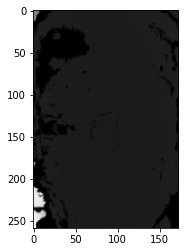

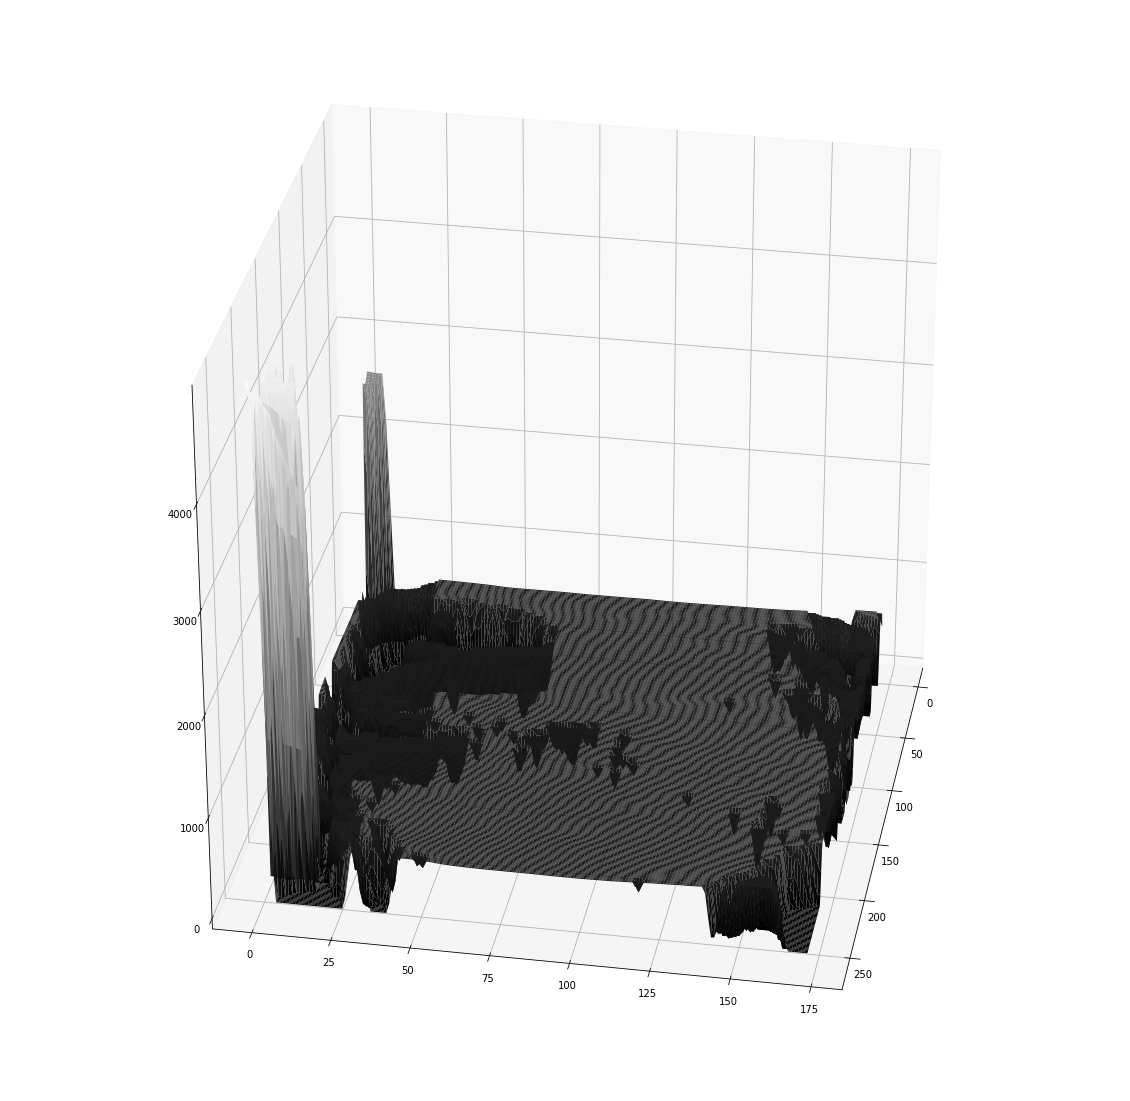

In [2]:
ok_depth = cv2.imread('depth_roi_data/real_depth_roi1.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)
ok_depth = cv2.filter2D(ok_depth, -1, smooth)
plt.imshow(ok_depth, cmap='gray')

plot3d(ok_depth)

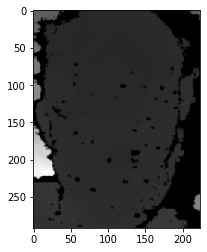

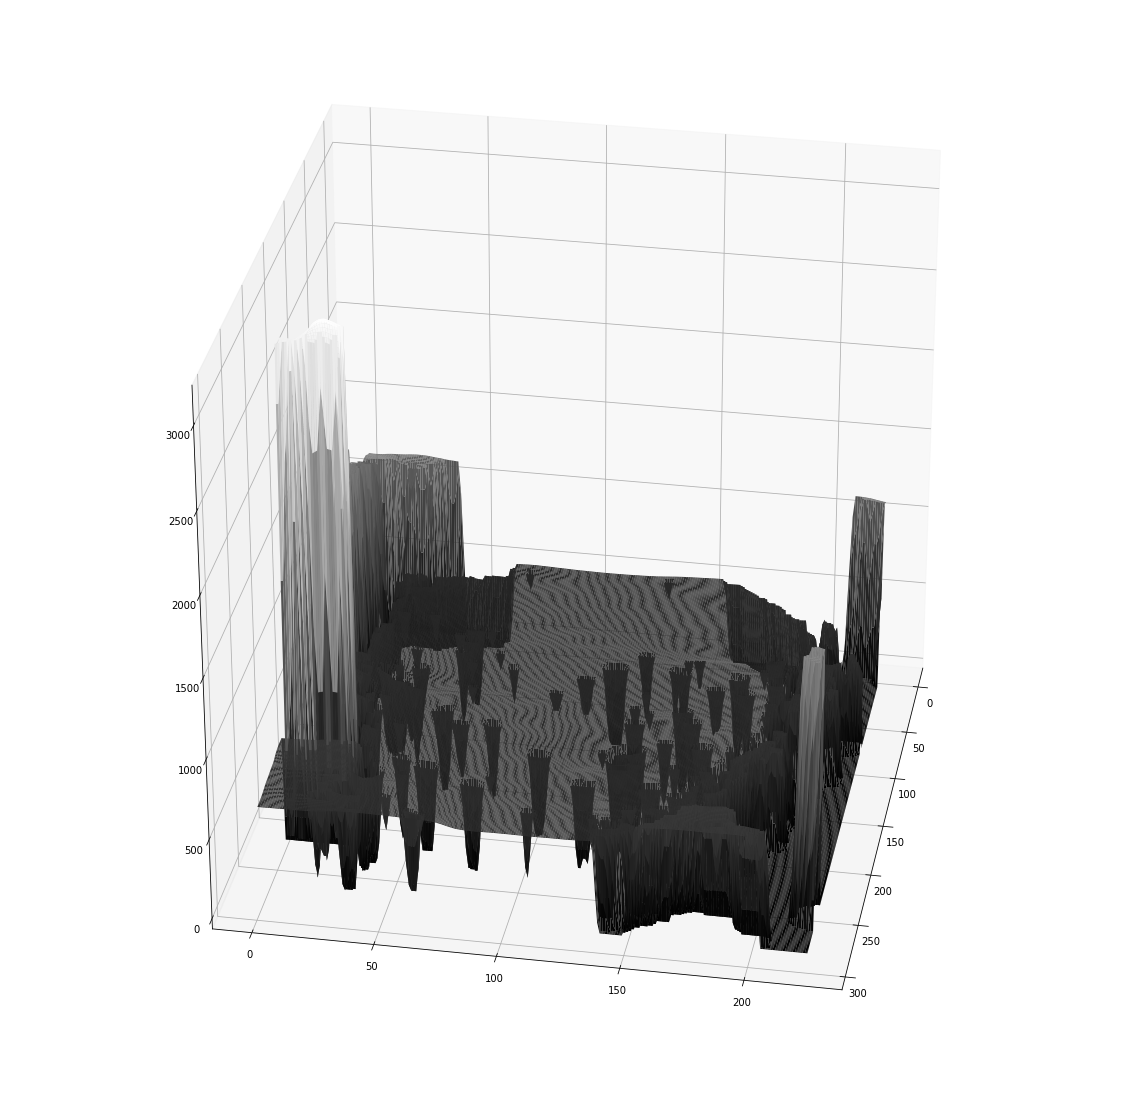

In [3]:
ok_depth = cv2.imread('depth_roi_data/real_depth_roi2.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)
ok_depth = cv2.filter2D(ok_depth, -1, smooth)
plt.imshow(ok_depth, cmap='gray')

plot3d(ok_depth)

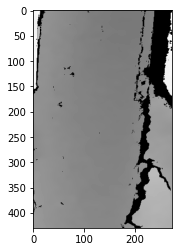

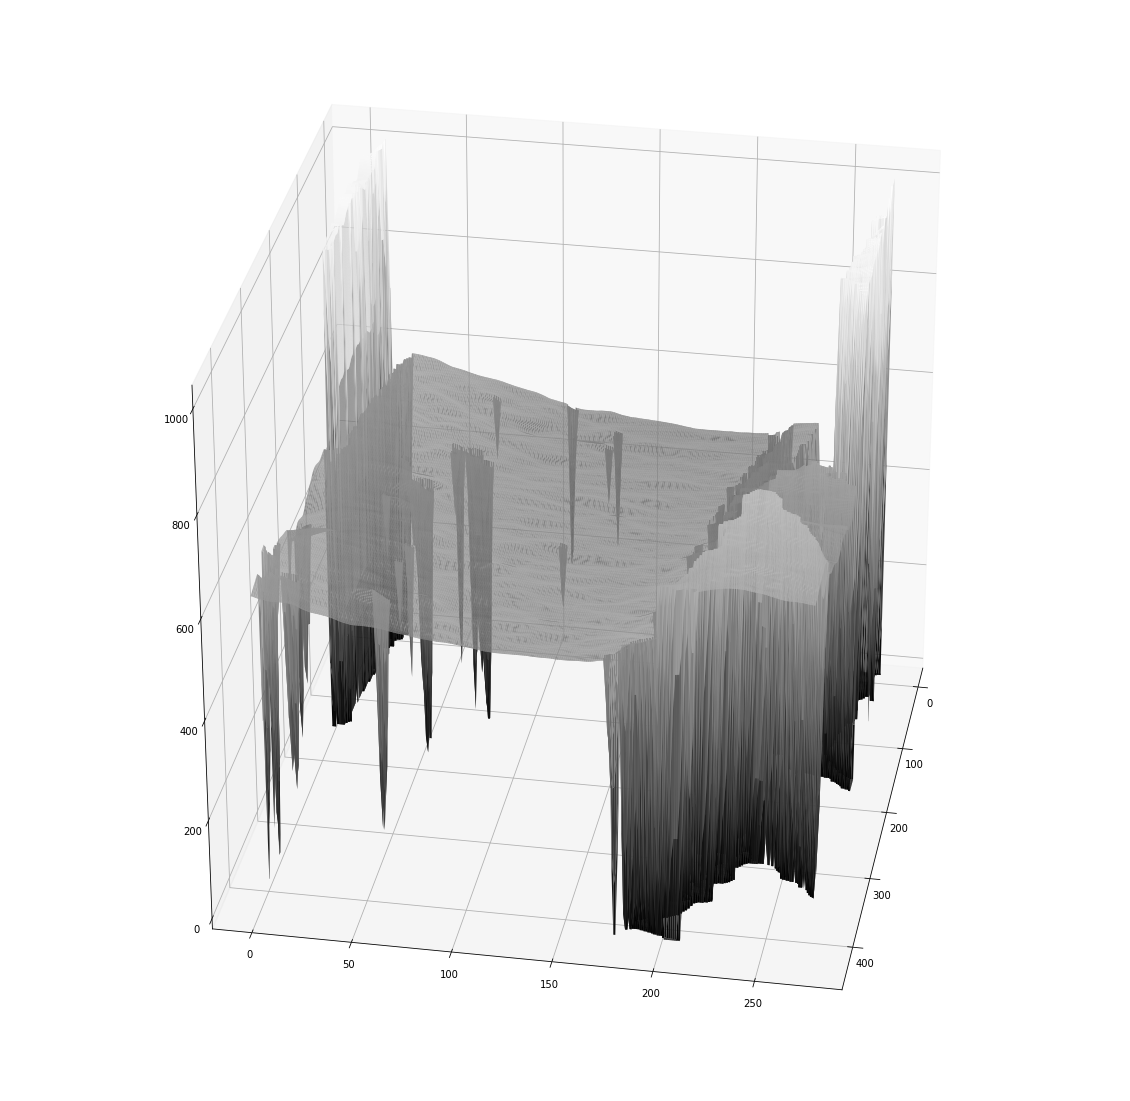

In [4]:
ok_depth = cv2.imread('depth_roi_data/spoof_depth_roi2.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)
ok_depth = cv2.filter2D(ok_depth, -1, smooth)
plt.imshow(ok_depth, cmap='gray')

plot3d(ok_depth)

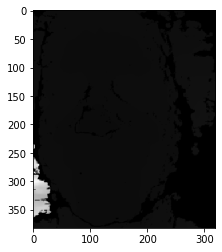

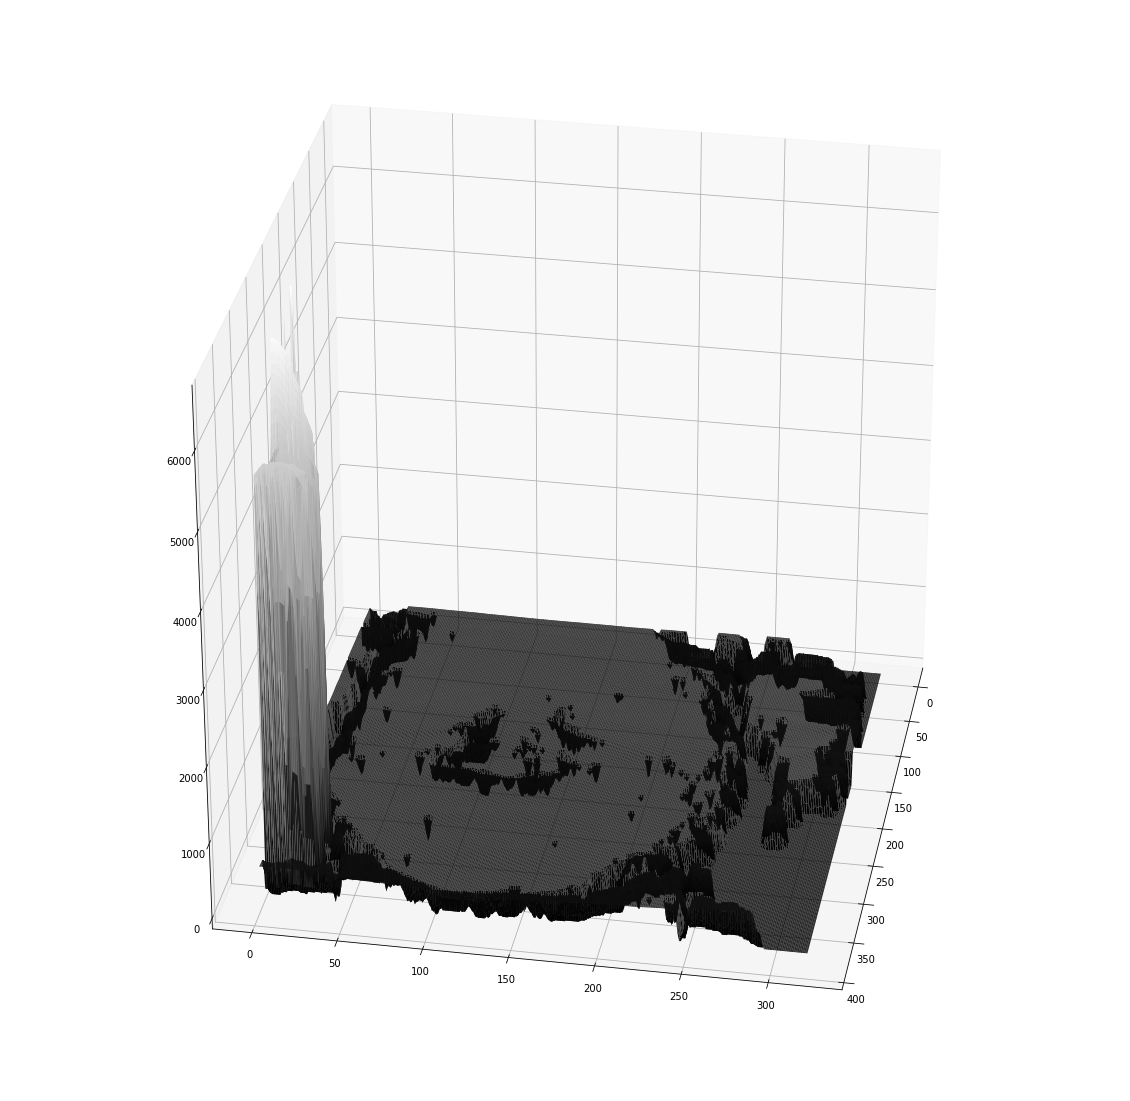

In [5]:
ok_depth = cv2.imread('depth_roi_data/real_depth_roi3.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)
ok_depth = cv2.filter2D(ok_depth, -1, smooth)
plt.imshow(ok_depth, cmap='gray')

plot3d(ok_depth)

(382, 320)
32
38


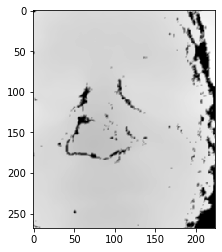

In [6]:
# Make a smaller roi around the vital parts
print(ok_depth.shape)
h2w = ok_depth.shape[0] / ok_depth.shape[1]

dx = int(0.2 * ok_depth.shape[1]) // 2
dy = int(h2w * dx)

print(dx)
print(dy)

tl_x = dx
tl_y = dy

br_x = ok_depth.shape[1] - 2 * dx
br_y = ok_depth.shape[0] - 2 * dy

depth_roi = ok_depth[tl_y : br_y, tl_x : br_x].astype(np.uint16)

plt.imshow(depth_roi, cmap='gray')

In [7]:
def compute_hist(img):
    bins = np.zeros(2**16)
    rows = img.shape[0]
    cols = img.shape[1]
    for row in range(0, rows):
        for col in range(0, cols):
            bins[img[row][col]] += 1
    return np.array(bins)

def smooth_out(hist, window_size=10):
    kernel = np.ones(shape=(2 * window_size))
    for i in range(0, hist.shape[0]):
        summation = 0.0
        count = 0
        for j in range(-window_size, window_size):
            idx = i + j
            if idx < 0 or idx > hist.shape[0] - window_size:
                continue
            summation += kernel[j] * hist[i + j]
            count += 1
        hist[i] = summation // count
        
    return hist

In [8]:
hist = compute_hist(depth_roi)
hist = smooth_out(hist)

print('Total of pixels: ', depth_roi.shape[0] * depth_roi.shape[1])

print('Number of zeros: %i' % hist[0])
print('Number of non-zeros: %i' % np.sum(hist[1:]))

print('Noise %: ', 100 * hist[0] / ( hist[0] + np.sum(hist[1:])))

Total of pixels:  60032
Number of zeros: 127
Number of non-zeros: 58513
Noise %:  0.2165757162346521


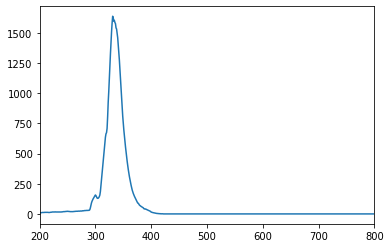

In [10]:
plt.xlim(200, 800)
plt.plot(hist)